<a href="https://colab.research.google.com/github/pedroEKS/EDA-IA-2025-2/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook é uma atividade de Análise Exploratória de Dados (EDA). O objetivo é carregar, tratar e visualizar dados do dataset "Steam Monthly Average Players", a fim de extrair insights sobre a popularidade dos jogos na plataforma Steam.

As análises seguem as solicitações da disciplina, incluindo a geração de Histogramas, Pairplots e Boxplots.


#Dataset Utilizado

  Nome: Steam Monthly Average Players

  Arquivo: steamcharts.csv

  Fonte (Kaggle): https://www.kaggle.com/datasets/lunthu/steam-monthly-average-players



#Análises Realizadas

O script de análise realiza os seguintes passos:

  Carregamento e Limpeza:

        Carrega o steamcharts.csv.

        Converte a coluna gain para formato numérico (pois ela é carregada como texto).

        Remove linhas onde dados essenciais (avg_players, peak_players, name, gain) estão faltando.


  Gráfico 1: Histograma (com KDE)

        Visualiza a distribuição da média de jogadores (avg_players).

        O gráfico é filtrado para mostrar apenas jogos com menos de 20.000 jogadores médios, permitindo uma visualização mais clara da grande maioria dos jogos.


  Gráfico 2: Pairplot

        Analisa a correlação entre as variáveis avg_players, peak_players e gain.

        Importante: Para evitar travamentos no Google Colab (devido ao grande volume de dados), este gráfico é gerado usando uma amostra aleatória de 1500 linhas do dataset.


  Gráfico 3: Boxplot

        Compara a distribuição da média de jogadores (avg_players) entre os 10 jogos com mais registros históricos (meses) no dataset.

        Isso permite uma comparação justa da popularidade e estabilidade dos jogos mais duradouros na plataforma.

Total de linhas após a limpeza: 605537

Gerando gráficos...


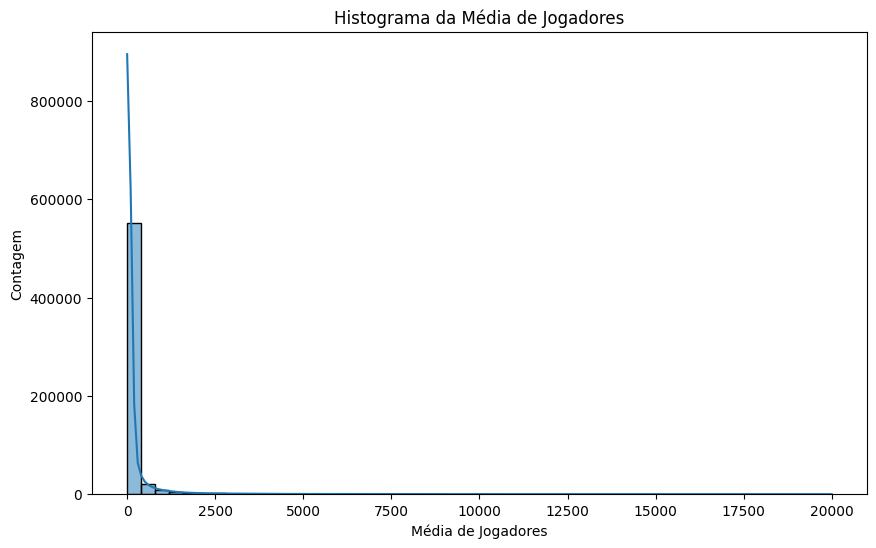

Gerando Pairplot (com amostra de 1500 linhas)...


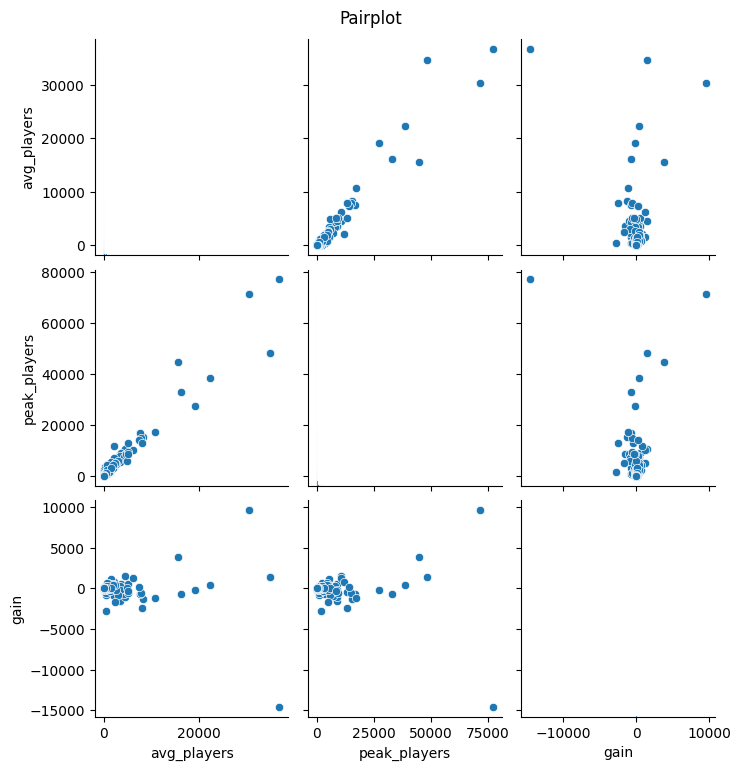

Gerando Boxplot...


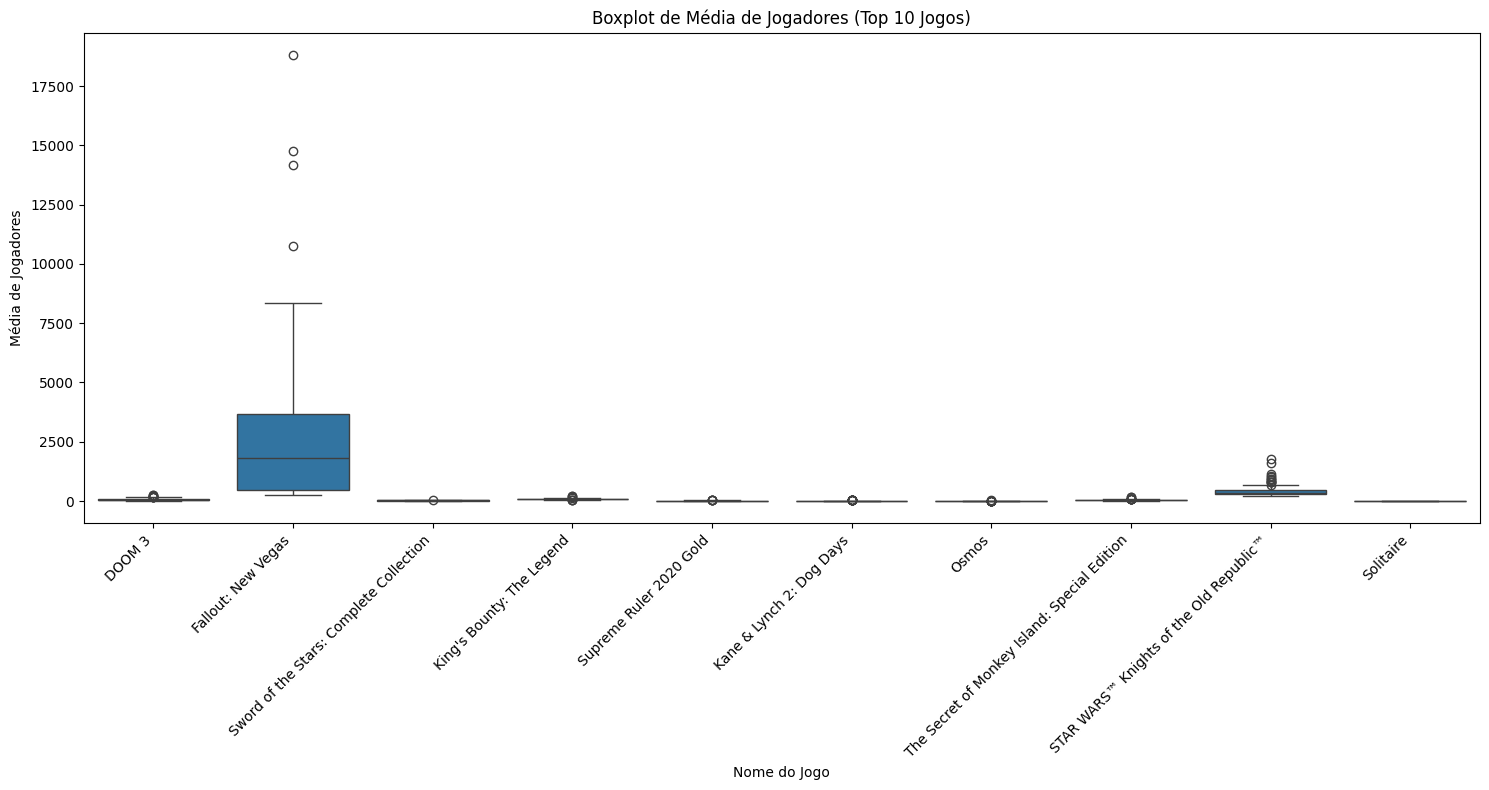

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("steamcharts.csv")

df['gain'] = pd.to_numeric(df['gain'], errors='coerce')
df_limpo = df.dropna(subset=['avg_players', 'peak_players', 'name', 'gain'])

print(f"Total de linhas após a limpeza: {len(df_limpo)}")
print("\nGerando gráficos...")

# Histograma
df_filtrado = df_limpo[df_limpo['avg_players'] < 20000]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtrado, x='avg_players', kde=True, bins=50)
plt.title('Histograma da Média de Jogadores')
plt.xlabel('Média de Jogadores')
plt.ylabel('Contagem')
plt.show()

#  Pairplot
print("Gerando Pairplot...")
df_amostra = df_limpo.sample(n=1500, random_state=1)

colunas_plotar = ['avg_players', 'peak_players', 'gain']
sns.pairplot(df_amostra[colunas_plotar])
plt.suptitle('Pairplot', y=1.02)
plt.show()

# Boxplot
print("Gerando Boxplot...")

top_10_jogos = df_limpo['name'].value_counts().index[:10]
df_top_10 = df_limpo[df_limpo['name'].isin(top_10_jogos)]

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_top_10, x='name', y='avg_players')
plt.title('Boxplot de Média de Jogadores (Top 10 Jogos)')
plt.xlabel('Nome do Jogo')
plt.ylabel('Média de Jogadores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()